In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

In [6]:
i1 = cv2.imread('im01.jpg',cv2.IMREAD_COLOR)
i2 = cv2.imread('im02.jpg',cv2.IMREAD_COLOR)

In [7]:
def click(event, x, y, flags, points):
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points) < 4:
            cv2.circle(img, (x,y), 2, (0, 0, 255), 2)
            cv2.putText(img, str(x) + ',' + str(y), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.imshow('image', img)
            points.append([y, x])

In [8]:
points1 = []
img = np.copy(i1)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points1)
cv2.waitKey(0)
cv2.destroyAllWindows()

points1 = np.asarray(points1, dtype=np.float32)
print(points1)

[[274. 438.]
 [278. 568.]
 [373. 398.]
 [371. 553.]]


In [9]:
points2 = []
img = np.copy(i2)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points2)
cv2.waitKey(0)
cv2.destroyAllWindows()

points2 = np.asarray(points2, dtype=np.float32)
print(points2)

[[298. 163.]
 [302. 284.]
 [407. 111.]
 [387. 271.]]


In [10]:
points2 = np.array(points2)
points1 = np.array(points1)

In [11]:
def matrixH(A, B):
    temp = np.zeros([8,9])
    for i in range(4):
        x1 = A[i][0]
        y1 = A[i][1]
        x2 = B[i][0]
        y2 = B[i][1]
        temp[2*i][:] = [x1,y1,1,0,0,0,-x2*x1,-x2*y1,-x2]
        temp[2*i+1][:] = [0,0,0,x1,y1,1,-y2*x1,-y2*y1,-y2]
        
        
    u,d,vt = linalg.svd(temp)
    v = vt[-1,:]
    v = v / v[-1]
    v = np.reshape(v, newshape=(3, 3))
    
    return v/v[2,2]

In [26]:
print(i1.shape)

(480, 640, 3)


homography matrix is
 [[ 9.66779421e-01 -2.87256399e-01  7.39400258e+00]
 [ 1.49923843e-01  3.87195921e-01  2.89721099e+02]
 [ 2.55764356e-04 -1.03470947e-03  1.00000000e+00]]


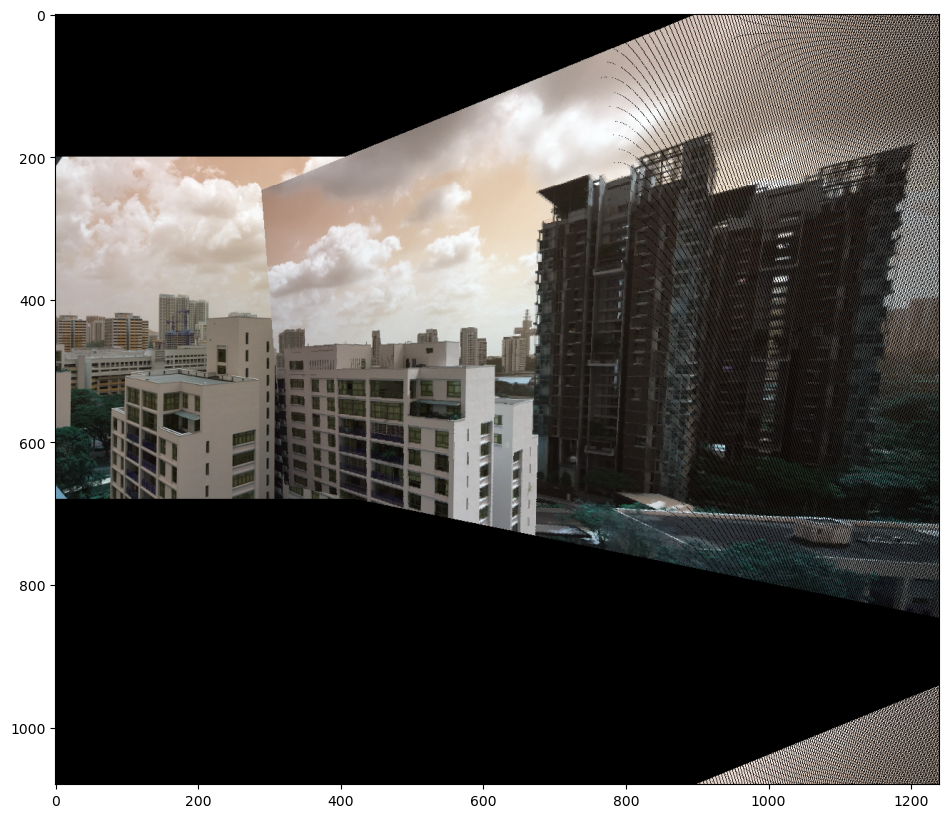

In [34]:
H = matrixH(points2, points1)
print('homography matrix is\n',H)

H1 = i1.shape[0]
W1 = i1.shape[1]
H2 = i2.shape[0]
W2 = i2.shape[1]

result = np.zeros([H1+600, W1+600, i1.shape[2]])

resultH = result.shape[0]
resultW = result.shape[1]

for i in range(0,1000):
    for j in range(0,1200):
        if i >= 200 and i < (200+H1) and j < W1:
            result[i][j] = i1[i-200][j]
i = 0
while i < H2:
    j = 0
    while j < W2:
        dim = H[2][0]*i + H[2][1]*j + H[2][2]
        tempx = (H[0][0]*i + H[0][1]*j + H[0][2]) / dim
        tempy = (H[1][0]*i + H[1][1]*j + H[1][2]) / dim
        if int(tempx)+200 < resultH and int(tempy) < resultW :
            result[int(tempx)+240][int(tempy)] = i2[int(i)][int(j)]
        j+=0.5
    i+=0.5

result = cv2.cvtColor(result.astype('float32'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(newImg.astype('uint8'))
plt.show()